In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
from numpy import mean
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve

In [33]:
#reading data from CSV file
df=pd.read_csv('data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [34]:
#set 'id_number' as index
df.set_index(['id'], inplace = True)

In [35]:
# Converted diagnosis B and M to binary 
df['diagnosis'] = df['diagnosis'].replace('B', 0)
df['diagnosis'] = df['diagnosis'].replace('M', 1)

In [36]:
#check of null values
df.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [37]:
#deleting the extra column
del df['Unnamed: 32']

In [38]:
#check of duplication 
df.duplicated().sum()

0

In [39]:
data = df

In [40]:
#describe the dataset
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


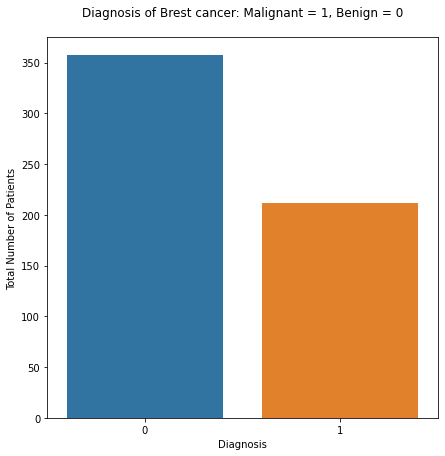

In [41]:
#showing diagnosis of brest cancer
plt.figure(figsize=(7,7))
axis = sns.countplot(data.diagnosis)
plt.xlabel("Diagnosis")
plt.ylabel("Total Number of Patients")
plt.title("Diagnosis of Brest cancer: Malignant = 1, Benign = 0\n")
plt.show()

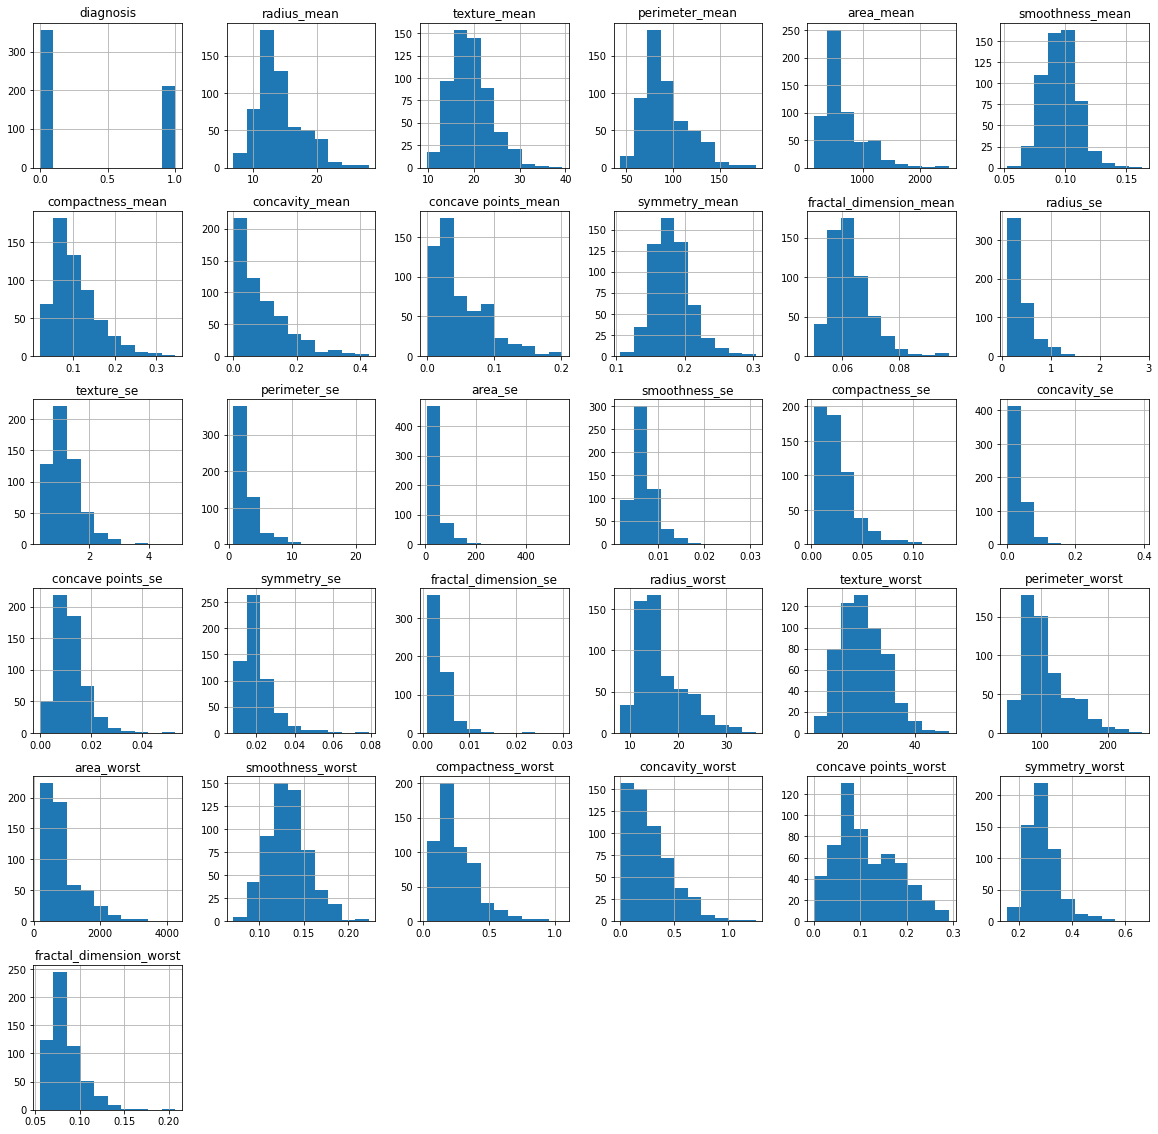

In [42]:
#display histogram of the features
data.hist(figsize=(20,20))
plt.show()

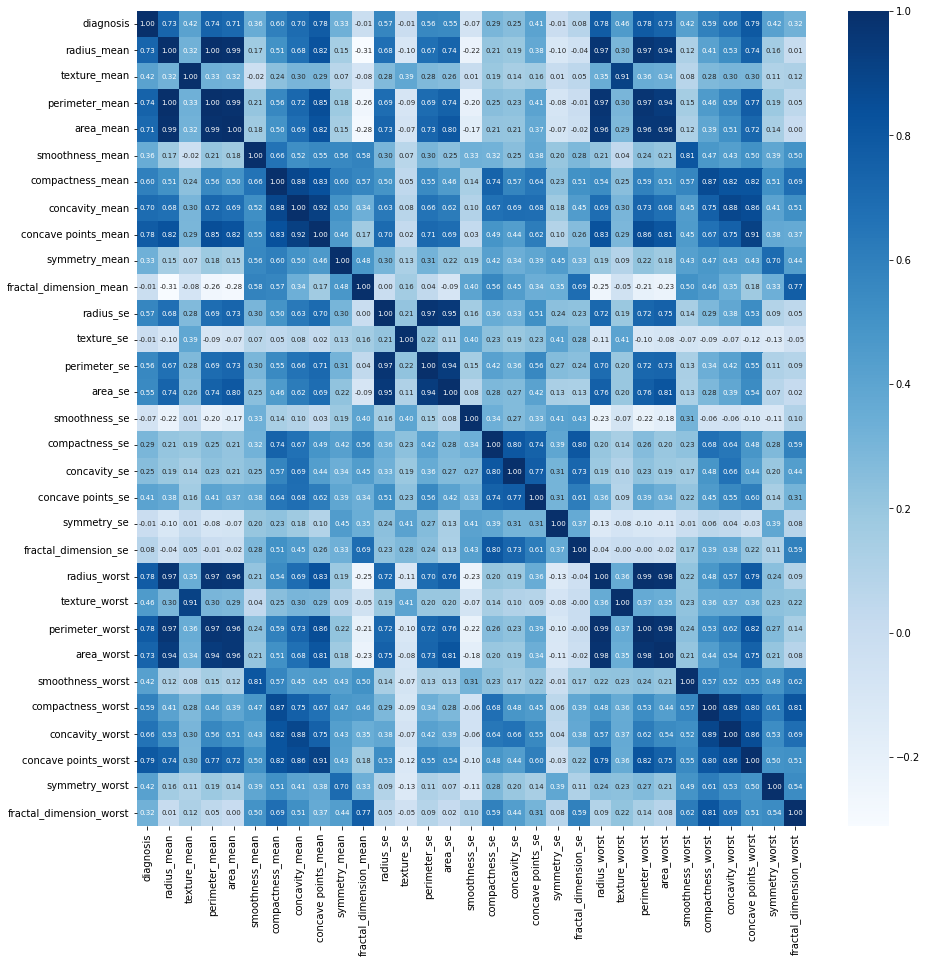

In [43]:
#display correlation heatmap
plt.figure(figsize=(15,15))
correlation = data.corr()
sns.heatmap(correlation,fmt='0.2f', annot=True, annot_kws={"size": 7}, cmap='Blues')

In [44]:
#correlation with output variable
corr_target = abs(correlation["diagnosis"])
#selecting highly correlated features
relevant_features = corr_target[corr_target>0.5]
relevant_features

diagnosis               1.000000
radius_mean             0.730029
perimeter_mean          0.742636
area_mean               0.708984
compactness_mean        0.596534
concavity_mean          0.696360
concave points_mean     0.776614
radius_se               0.567134
perimeter_se            0.556141
area_se                 0.548236
radius_worst            0.776454
perimeter_worst         0.782914
area_worst              0.733825
compactness_worst       0.590998
concavity_worst         0.659610
concave points_worst    0.793566
Name: diagnosis, dtype: float64

In [45]:
X = data.drop('diagnosis', axis=1) # features
Y = data['diagnosis']  # target variable

In [46]:
# View count of each class
Y.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [47]:
#feature scaling 
sc = StandardScaler() 
X_scaled = sc.fit_transform(X) 

In [48]:
#split data into training and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, Y, test_size = 0.20, random_state = 0)

In [49]:
# define model 
BC = BaggingClassifier()
BC.fit(X_train,Y_train)

#prediction
y_pred1 =BC.predict(X_test)

In [50]:
# define evaluation procedure
cv1 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores1 = cross_val_score(BC, X_train, Y_train, scoring='roc_auc', cv=cv1, n_jobs=-1)
for i in range(0, len(scores1)):
  print("Cross validation for k={0}: {1: 0.2f}".format(i, scores1[i]))
print ('\nAccuracy %s' % round((scores1[i]*100),2))
# summarize performance
print('Mean ROC AUC: %.2f' % mean(scores1))

Cross validation for k=0:  0.99
Cross validation for k=1:  1.00
Cross validation for k=2:  0.99
Cross validation for k=3:  0.98
Cross validation for k=4:  0.96
Cross validation for k=5:  0.99
Cross validation for k=6:  0.99
Cross validation for k=7:  1.00
Cross validation for k=8:  0.96
Cross validation for k=9:  0.98

Accuracy 97.67
Mean ROC AUC: 0.98


Text(33.0, 0.5, 'Actual Values ')

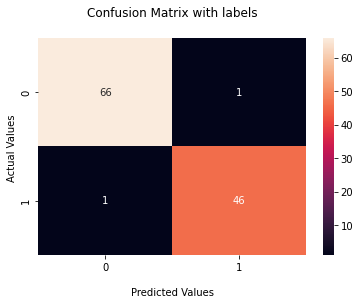

In [51]:
confusion_matrix1 = confusion_matrix(Y_test, y_pred1)
sns.heatmap(confusion_matrix1,annot=True,fmt="d")
plt.title('Confusion Matrix with labels\n')
plt.xlabel('\nPredicted Values')
plt.ylabel('Actual Values ')

In [52]:
probabilityvector1 = BC.predict_proba(X_test)[:, 1]
FPR, TPR, thresholds = metrics.roc_curve(Y_test, probabilityvector1, pos_label=1)

Area under Curve: 0.9987297554779295


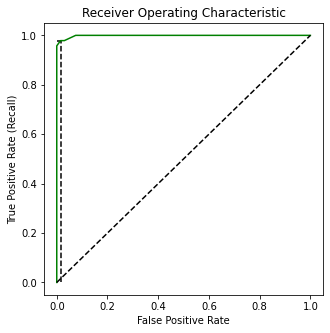

In [53]:
fig, ax = plt.subplots(figsize=(5, 5))
roc_auc = metrics.auc(FPR, TPR)    
recall = metrics.recall_score(Y_test, y_pred1)

ax.plot(FPR, TPR, color='green')
ax.plot([0,1], [0,1], color='black', linestyle='dashed')
ax.hlines(y=recall, xmin=0, xmax=1-confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[0,1]), color='black', linestyle='dashed')
ax.vlines(x=1-confusion_matrix1[0,0]/(confusion_matrix1[0,0]+confusion_matrix1[0,1]), ymin=0, ymax=recall, color='black', linestyle='dashed')
ax.set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver Operating Characteristic")     
print("Area under Curve:", roc_auc)

In [54]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        67
           1       0.98      0.98      0.98        47

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [55]:
#define model 
RF = RandomForestClassifier(n_estimators=100)

#Train the model using the training sets 
RF.fit(X_train,Y_train)

#prediction
y_pred =RF.predict(X_test)

In [56]:
#define evaluation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
#evaluate model
scores = cross_val_score(RF, X_train, Y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
for i in range(0, len(scores)):
  print("Cross validation for k={0}: {1: 0.2f}".format(i, scores[i]))
print ('\nAccuracy %s' % round((scores[i]*100),2))
# summarize performance
print('Mean ROC AUC: %.2f' % mean(scores))

Cross validation for k=0:  0.98
Cross validation for k=1:  1.00
Cross validation for k=2:  1.00
Cross validation for k=3:  1.00
Cross validation for k=4:  0.96
Cross validation for k=5:  1.00
Cross validation for k=6:  0.99
Cross validation for k=7:  1.00
Cross validation for k=8:  0.98
Cross validation for k=9:  1.00

Accuracy 100.0
Mean ROC AUC: 0.99


Text(33.0, 0.5, 'Actual Values ')

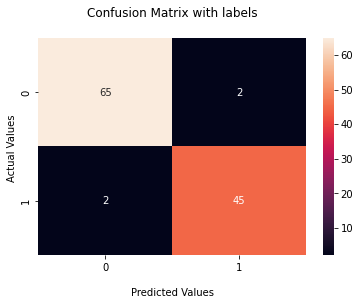

In [57]:
#confusion_matrix of model 1
confusion_matrix = confusion_matrix(Y_test, y_pred)
sns.heatmap(confusion_matrix,annot=True,fmt="d")
plt.title('Confusion Matrix with labels\n')
plt.xlabel('\nPredicted Values')
plt.ylabel('Actual Values ')

In [58]:
probabilityvector = RF.predict_proba(X_test)[:, 1]
FPR, TPR, thresholds = metrics.roc_curve(Y_test, probabilityvector, pos_label=1)

Area under Curve: 0.9969831692600826


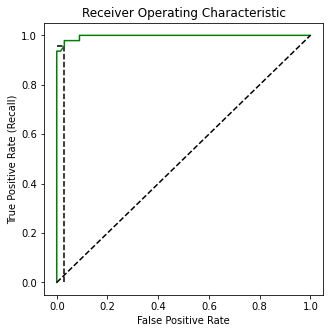

In [59]:
#Plot ROC carve 
fig, ax = plt.subplots(figsize=(5, 5))
roc_auc = metrics.auc(FPR, TPR)    
recall = metrics.recall_score(Y_test, y_pred)

ax.plot(FPR, TPR, color='green')
ax.plot([0,1], [0,1], color='black', linestyle='dashed')
ax.hlines(y=recall, xmin=0, xmax=1-confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]), color='black', linestyle='dashed')
ax.vlines(x=1-confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]), ymin=0, ymax=recall, color='black', linestyle='dashed')
ax.set(xlabel='False Positive Rate', ylabel="True Positive Rate (Recall)", title="Receiver Operating Characteristic")     
print("Area under Curve:", roc_auc)

In [60]:
#calculating test scores.
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        67
           1       0.96      0.96      0.96        47

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

